## This file is for plotting the results for Experiment 5: Activation Functions

#### Combining the results from the BaseModel (Sigmoid) and the other activation functions from experiment 5

In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys


In [17]:
# load the results from Experiment 5
exp5_results = pd.read_csv('Output/exp5_activation_function_results.csv')
exp5_results.head()

,Activation Function,Epoch,Train Loss,Test Loss,Train Accuracy,Test Accuracy,Train Jaccard,Test Jaccard,Train Precision,Test Precision,Train Recall,Test Recall,Train Dice,Test Dice
0,ReLU,1,0.151496,0.183779,0.946642,0.956908,0.604111,0.577104,0.784786,0.872610,0.713716,0.629265,0.733149,0.723210
1,ReLU,2,0.080162,0.066666,0.969785,0.976890,0.734556,0.774290,0.861055,0.895315,0.832700,0.848014,0.841993,0.869119
2,ReLU,3,0.068350,0.084042,0.974570,0.973154,0.774106,0.754764,0.884904,0.865261,0.862699,0.843906,0.869759,0.851882
3,ReLU,4,0.060831,0.058184,0.977605,0.980065,0.795570,0.797979,0.904678,0.941039,0.867432,0.835864,0.883359,0.883804
4,ReLU,5,0.056793,0.051336,0.978923,0.984211,0.807258,0.845058,0.905568,0.918104,0.883286,0.912339,0.890929,0.914216


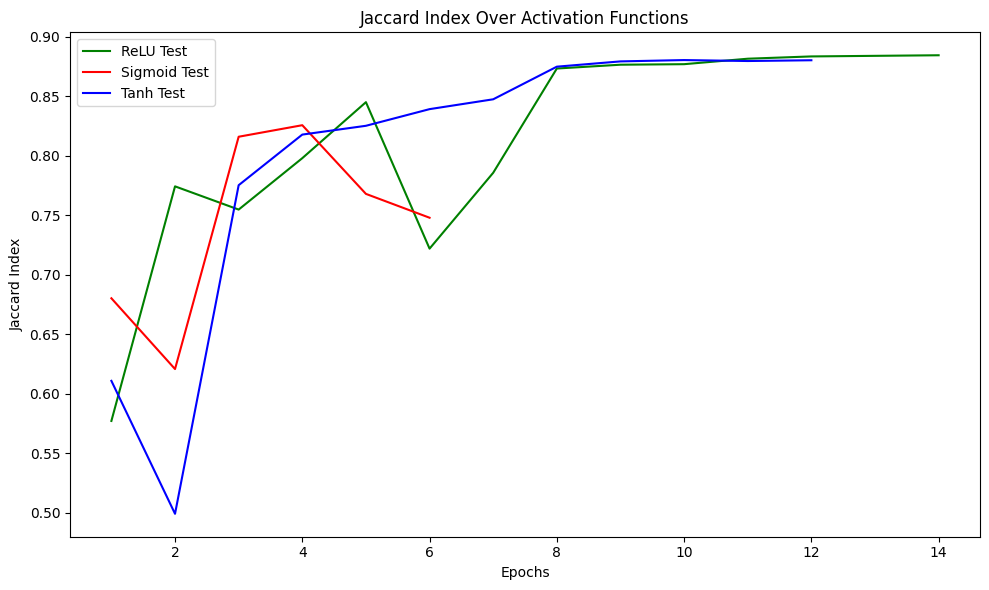

In [18]:
# Plot the Jaccard Index over epochs for each activation function

def plot_metrics(df):
    # Extract unique activation functions
    activations = df['Activation Function'].unique()
    
    # Create a figure with a single subplot
    fig, ax = plt.subplots(figsize=(10, 6))  # Single plot for Jaccard
    colors = ['green', 'red', 'blue', 'orange']  # Use distinct colors for each activation function

    # Jaccard column names
    jaccard_col = ('Train Jaccard', 'Test Jaccard')

    # Plot Jaccard over epochs (combined plot)
    for j, activation in enumerate(activations):
        res_df = df[df['Activation Function'] == activation]
        epochs = res_df['Epoch']
        # Plot Train and Test Jaccard
        # ax.plot(epochs, res_df[jaccard_col[0]], label=f'{activation} Train', color=colors[j], linestyle='--')
        ax.plot(epochs, res_df[jaccard_col[1]], label=f'{activation} Test', color=colors[j])
    
    ax.set_title('Jaccard Index Over Activation Functions')
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Jaccard Index')
    ax.legend()

    plt.tight_layout()
    plt.show()

# Call the plot_metrics function with the combined dataframe
plot_metrics(exp5_results)


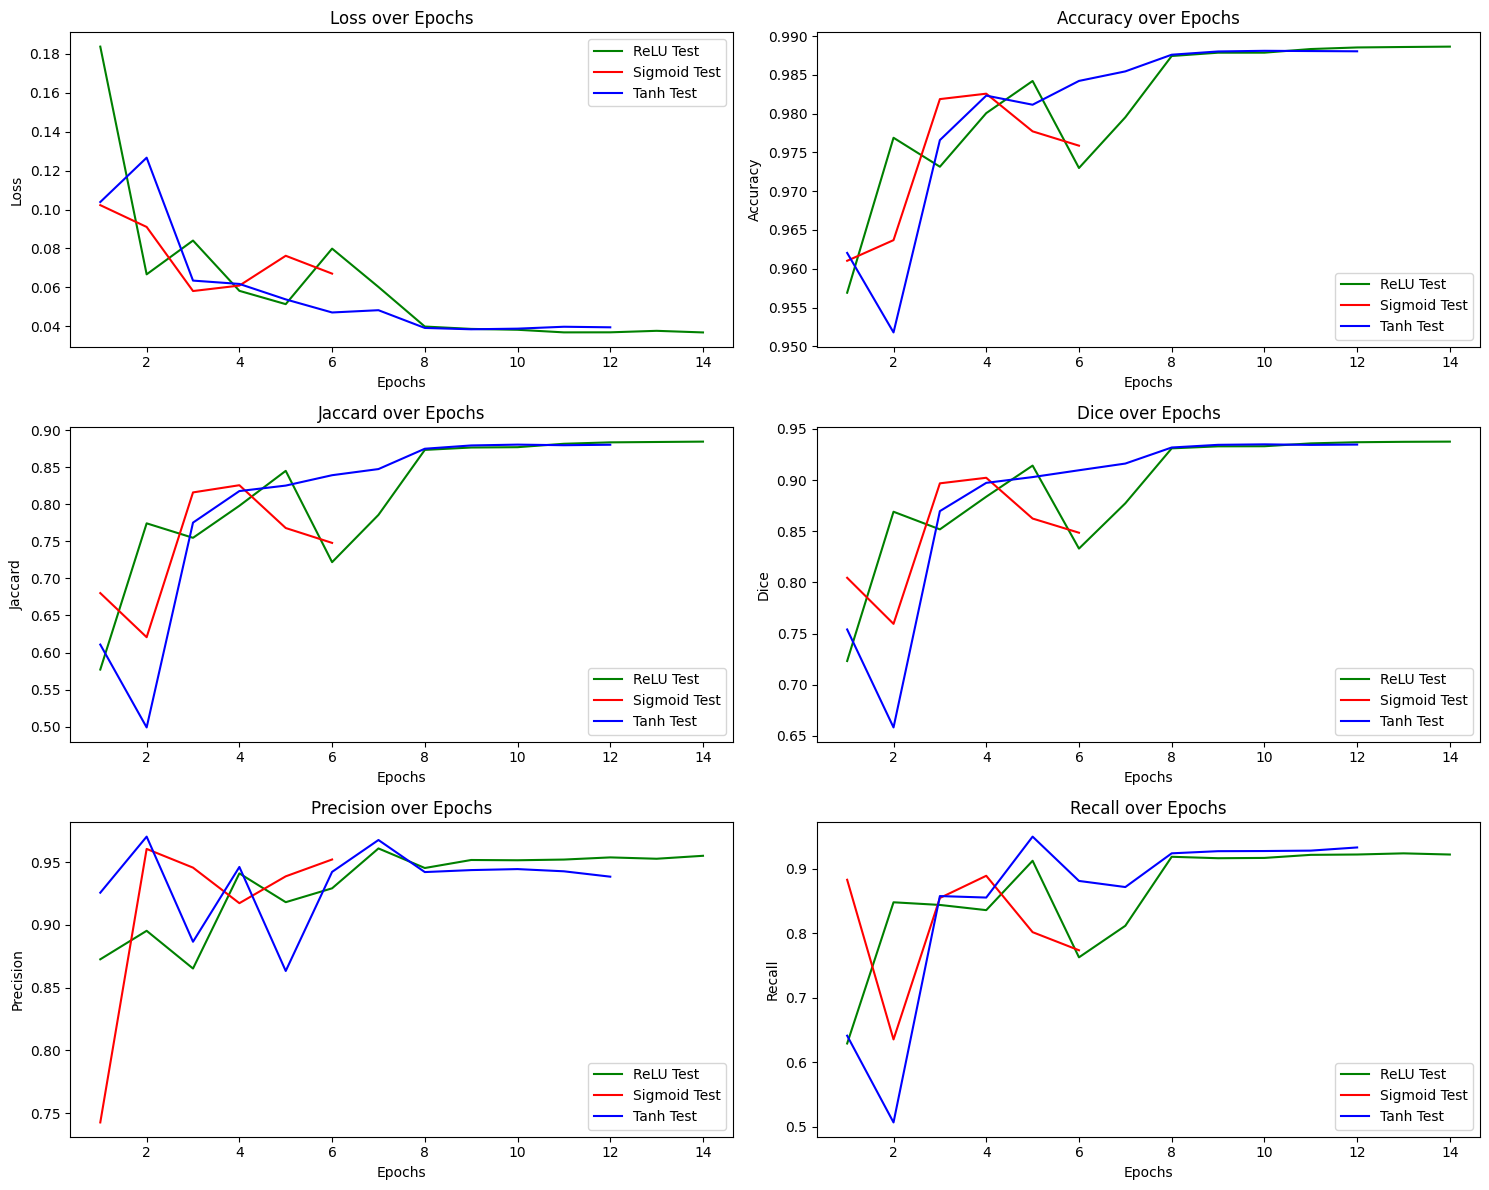

In [19]:
def plot_metrics(df):
    # Extract unique resolutions
    activations = df['Activation Function'].unique()
    
    # Create a figure with 6 subplots (one for each metric)
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns
    colors = ['green', 'red', 'blue', 'orange']  # Use 4 distinct colors

    # List of metrics to plot
    metrics = ['Loss', 'Accuracy', 'Jaccard', 'Dice', 'Precision', 'Recall']
    metric_columns = [
        ('Train Loss', 'Test Loss'),
        ('Train Accuracy', 'Test Accuracy'),
        ('Train Jaccard', 'Test Jaccard'),
        ('Train Dice', 'Test Dice'),
        ('Train Precision', 'Test Precision'),
        ('Train Recall', 'Test Recall')
    ]
    
    # Iterate over each metric and plot
    for i, (metric, (train_col, test_col)) in enumerate(zip(metrics, metric_columns)):
        row = i // 2  # Determine row position (0, 1, or 2)
        col = i % 2   # Determine column position (0 or 1)

        # Plot data for each resolution with different colors
        for j, activation in enumerate(activations):
            res_df = df[df['Activation Function'] == activation]
            epochs = res_df['Epoch']
            
            # Plot Training and Testing data
            # axes[row, col].plot(epochs, res_df[train_col], label=f'{resolution} Train', color=colors[j])
            axes[row, col].plot(epochs, res_df[test_col], label=f'{activation} Test', color=colors[j])#, linestyle='--')
        
        axes[row, col].set_title(f'{metric} over Epochs')
        axes[row, col].set_xlabel('Epochs')
        axes[row, col].set_ylabel(metric)
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

# Call the plot_metrics function with the combined dataframe
plot_metrics(exp5_results)

In [20]:
# Filter the results for only Jaccard Index
jaccard_results = exp5_results[['Activation Function', 'Epoch', 'Test Jaccard']]
jaccard_results


,Activation Function,Epoch,Test Jaccard
0,ReLU,1,0.577104
1,ReLU,2,0.774290
2,ReLU,3,0.754764
3,ReLU,4,0.797979
4,ReLU,5,0.845058
5,ReLU,6,0.721936
6,ReLU,7,0.785693
7,ReLU,8,0.873330
8,ReLU,9,0.876534
9,ReLU,10,0.876980


In [21]:
# Transpose the dataframe to have Activation Functions as columns
jaccard_pivot = jaccard_results.pivot(index='Epoch', columns='Activation Function', values='Test Jaccard')
jaccard_pivot

Activation Function,ReLU,Sigmoid,Tanh
Epoch,,,
1,0.577104,0.680210,0.610804
2,0.774290,0.620717,0.499055
3,0.754764,0.815987,0.775256
4,0.797979,0.825690,0.817806
5,0.845058,0.767958,0.825195
6,0.721936,0.747912,0.839192
7,0.785693,NaN,0.847468
8,0.873330,NaN,0.874883
9,0.876534,NaN,0.879323
